


# Lab 04- 
## Gridded Data

In [6]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [7]:
#Import data
filepath = '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab4\\Data\\landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '\\Users\\lucin

## Question 1

In [13]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

#Resample for daily avg
xds_daily = xds.resample(time='1D').mean()

# Florence, OR
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

# Eugene, OR
eugene_weather = xds_daily.sel(latitude=44.05245610512474, longitude=-123.08765645645519, method='nearest')

C:\Users\lucin\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\lucin\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\lucin\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\lucin\anaconda3\envs\lab4\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.g

### 1a)

In [14]:
Jan31_temp = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (Jan31_temp))

Jan31_cc = (florence_weather['tcc'][30].values *100)
print('Cloud cover in Florence on Jan 31, 2020 = ' + str(round(Jan31_cc, 2)) + '%')

Air temperature in Florence on Jan 31, 2020 = 53.82 F
Cloud cover in Florence on Jan 31, 2020 = 99.98%


### 1b)

In [15]:
Feb15_temp = (eugene_weather['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (Feb15_temp))


Feb15_cc = (eugene_weather['tcc'][45].values *100)
print('Cloud cover in Eugene on Feb 15, 2020 = ' + str(round(Feb15_cc, 2)) + '%')

Air temperature in Eugene on Feb 15, 2020 = 42.00 F
Cloud cover in Eugene on Feb 15, 2020 = 99.99%


## Question 2

In [16]:
xds_avg = xds.resample(time='1y').mean()
xds_avg

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 282.0 282.7 ... 298.6 298.6
    tcc        (time, latitude, longitude) float32 0.7715 0.7246 ... 0.4797

### 2a)

In [17]:
hottest_value = xds_avg['t2m'].argmax()
hot_idx = np.unravel_index(hottest_value, xds_avg['t2m'].shape)
hottest_lat = xds_avg['t2m'][hot_idx].latitude
hottest_lon = xds_avg['t2m'][hot_idx].longitude

print('The average hottest location is at approximately Plan de Ayala Hermosillo México')

The average hottest location is at approximately Plan de Ayala Hermosillo México


### 2b)

In [97]:
coldest_value = xds_avg['t2m'].argmin()
cold_idx = np.unravel_index(coldest_value, xds_avg['t2m'].shape)
coldest_lat = xds_avg['t2m'][cold_idx].latitude
coldest_lon = xds_avg['t2m'][cold_idx].longitude

print('The average coldest location is at approximately Cody, Wyoming, United States')

The average coldest location is at approximately Cody Wyoming United States


### 2c)

In [101]:
cloudy_value = xds_avg['tcc'].argmax()
cloudy_idx = np.unravel_index(cloudy_value, xds_avg['tcc'].shape)
cloudy_lat = xds_avg['tcc'][cloudy_idx].latitude
cloudy_lon = xds_avg['tcc'][cloudy_idx].longitude

print('The average cloudiest location is at approximately Port Alberni, BC')

The average cloudiest location is at approximately Port Alberni, BC


### 2d)

In [107]:
uncloudy_value = xds_avg['tcc'].argmin()
uncloudy_idx = np.unravel_index(uncloudy_value, xds_avg['tcc'].shape)
uncloudy_lat = xds_avg['tcc'][uncloudy_idx].latitude
uncloudy_lon = xds_avg['tcc'][uncloudy_idx].longitude

print('The least cloudy location is at the north shore of the Gulf of California, at the coordinates (31.49, -114.75)')

The least cloudy location is at the north shore of the Gulf of California, at the coordinates (31.49, -114.75)


### 2e)

In [19]:
xds_min = xds.resample(time='1d').min()
xds_max = xds.resample(time='1d').max()
xds_range = xds_max - xds_min

big_range = xds_range['t2m'].argmax()
range_idx = np.unravel_index(big_range, xds_range['t2m'].shape)
range_lat = xds_range['t2m'][range_idx].latitude
range_lon = xds_range['t2m'][range_idx].longitude

In [20]:
range_lat

<xarray.DataArray 'latitude' ()>
array(37.49, dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-09-08
    longitude  float32 -104.0
    latitude   float32 37.49
Attributes:
    units:      degrees_north
    long_name:  latitude

In [21]:
range_lon

<xarray.DataArray 'longitude' ()>
array(-104., dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-09-08
    longitude  float32 -104.0
    latitude   float32 37.49
Attributes:
    units:      degrees_east
    long_name:  longitude

### 2f)

In [44]:
cold = xds.resample(time='6h').min()

colddd = cold['t2m'].argmin()
colddd_idx = np.unravel_index(colddd, xds_min['t2m'].shape)
colddd_lat = xds_min['t2m'][range_idx].latitude
colddd_lon = xds_min['t2m'][range_idx].longitude
colddd_date = xds_min['t2m'][range_idx].time
colddd_temp = xds_min['t2m'][range_idx].values

print(f"The colddest recorded temperature was at Thatcher, Colorado (37.49, -104.0)./nThe temperature there reached - on September 8, 2020.")

The colddest recorded temperature was at Thatcher, Colorado (37.49, -104.0)./nThe temperature there reached - on September 8, 2020.


In [45]:
colddd_temp

array(278.14252, dtype=float32)

In [46]:
colddd_lon

<xarray.DataArray 'longitude' ()>
array(-104., dtype=float32)
Coordinates:
    time       datetime64[ns] 2020-09-08
    longitude  float32 -104.0
    latitude   float32 37.49
Attributes:
    units:      degrees_east
    long_name:  longitude

## Question 3

### 3a)

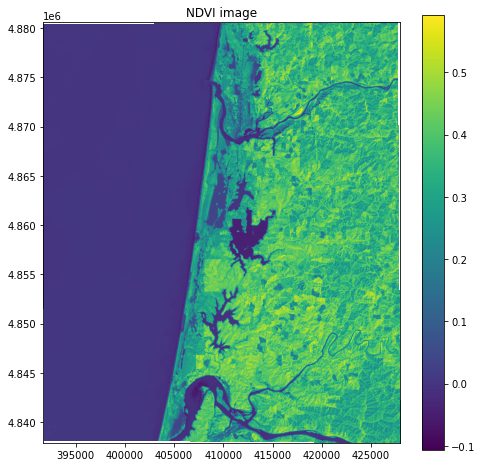

In [45]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), 
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float))) # Extra credit for fixing this error...

# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

### 3b)

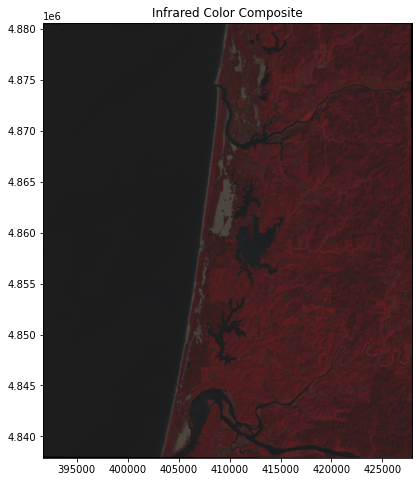

In [46]:
# Produce a new array by stacking the RGB bands
inf_red = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))

# Plot as RGB image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(inf_red, extent=full_extent)
ax.set_title("Infrared Color Composite")
plt.show()